In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_csv('heart_failure.csv')

In [ ]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
data.shape

(299, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
colors = ['#4ec5f7','#f52c78','#f8e06e','#b2badc','#57ff62','#d8bfd8','#5c1a6c','#6244ed','#a7a9cd']
plt.figure(figsize = (8,6))
for i in data.columns:
    data[i].value_counts().plot.pie(textprops={'color':"w"},pctdistance=0.7,autopct='%.2f%%',colors=colors, figsize=(5,5),labels=None,subplots=True)
    plt.title("{} Distribution ".format(i),fontsize=17,ha='right')
    plt.legend(labels=data[i].value_counts().index, loc="best",bbox_to_anchor=(1, 0.25, 0.5, 0.5))
    plt.show()

In [ ]:
for i in data.columns:
    sns.countplot(y=i, data=data, palette =['#4ec5f7','#f52c78'])
    plt.show()

In [ ]:
print(data[data.platelets == 850000])

      age  anaemia  creatinine_phosphokinase  ...  smoking  time  DEATH_EVENT
109  45.0        0                       292  ...        1    88            0

[1 rows x 13 columns]


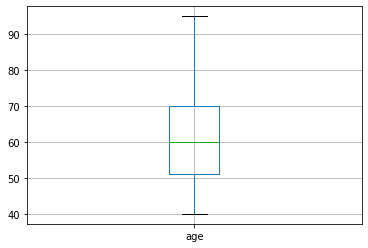

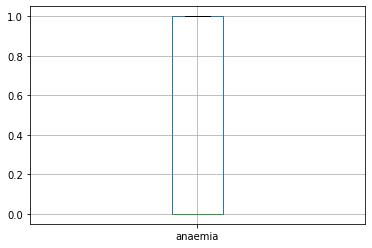

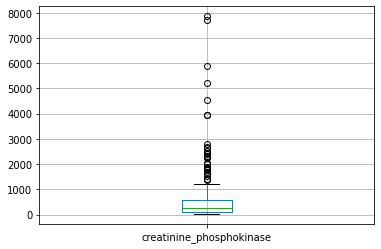

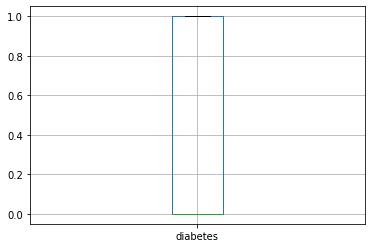

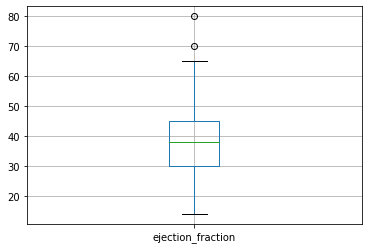

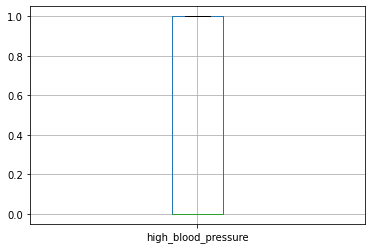

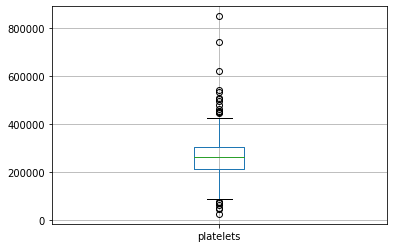

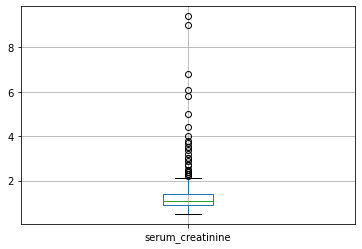

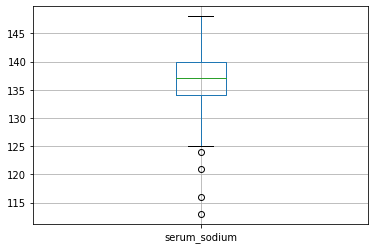

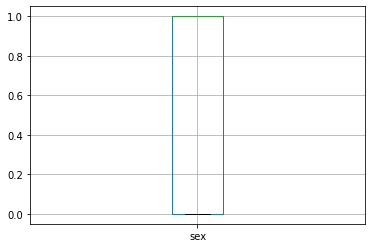

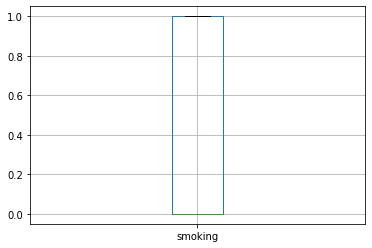

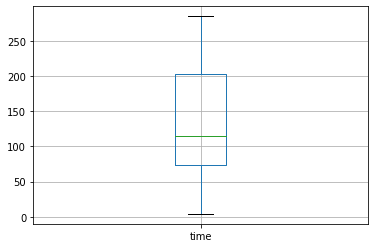

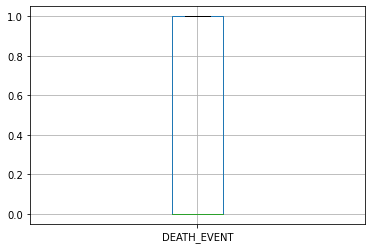

In [ ]:
for i in data.columns:
    data.boxplot(i)
    plt.show()

Analising the data something like outliers aparented,
but i don't believe that's a mistake, maybe those high
values are so diferent of the others because of the small shape
of the dataset and also cause of this i'm not going to remove those data.

In [ ]:
data.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


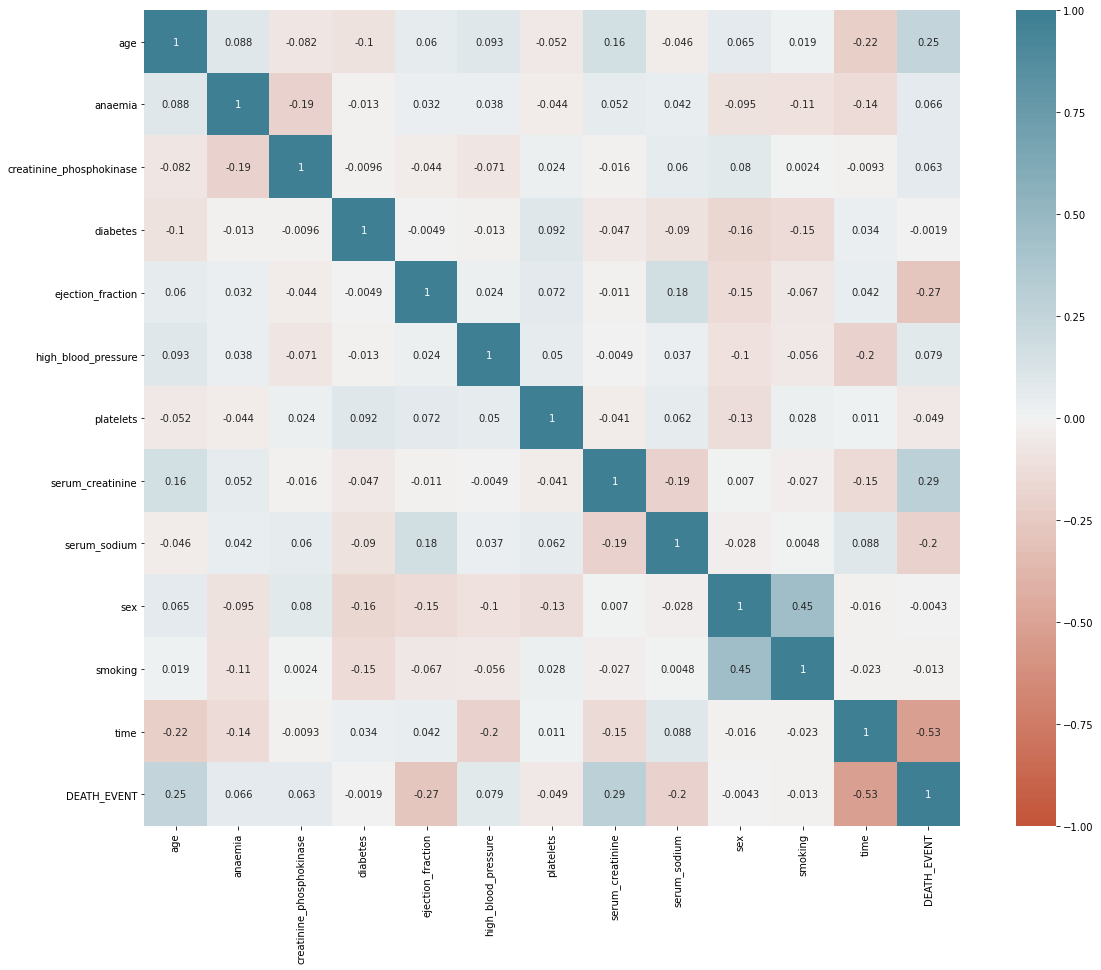

In [ ]:
plt.subplots(figsize=(20,15))
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)

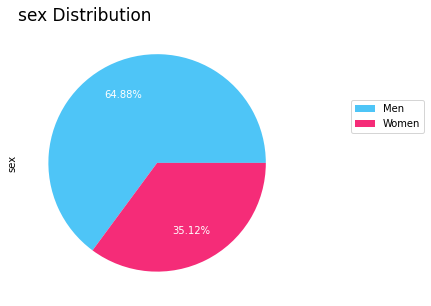

In [ ]:
DS = data[data.DEATH_EVENT == 1]
DS.head()
data['sex'].value_counts().plot.pie(textprops={'color':"w"},pctdistance=0.7,autopct='%.2f%%',colors=colors, figsize=(5,5),labels=None,subplots=True)
plt.title("{} Distribution ".format('sex'),fontsize=17,ha='right')
plt.legend(('Men','Women'),bbox_to_anchor=(1, 0.25, 0.5, 0.5))
plt.show()

the data show us that the longer the patient's follow-up time, the lower the chance of suffering a heart attack, and also that sex is a decisive fact, besides other factors
the percentage of blood leaving the heart at each contraction

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
X = data.drop('DEATH_EVENT', axis = 1)
y = data.DEATH_EVENT

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [ ]:
# using Random Forest Classifier
rfc = RandomForestClassifier(max_depth=6, random_state=42)
rfc.fit(X_train, y_train)
pred1 = rfc.predict(X_test)
print(classification_report(y_test, pred1))
confusion_matrix(pred1, y_test)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        62
           1       0.91      0.71      0.80        28

    accuracy                           0.89        90
   macro avg       0.90      0.84      0.86        90
weighted avg       0.89      0.89      0.88        90



array([[60,  8],
       [ 2, 20]])

The most important metric for this model is the recall, since it is crucial that we correctly point out all positive cases in order to save as many lives as possible, but it is also very important that we do not point out negative cases as possible in order not to have unnecessary extra expenses and care.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
Classifier = LogisticRegression(random_state=42,max_iter=100)
Classifier.fit(X_train,y_train)
pred3 = Classifier.predict(X_test)
print(classification_report(y_test, pred3))
confusion_matrix(pred3, y_test)

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        62
           1       0.82      0.64      0.72        28

    accuracy                           0.84        90
   macro avg       0.84      0.79      0.81        90
weighted avg       0.84      0.84      0.84        90



array([[58, 10],
       [ 4, 18]])